Importing the Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import shap


Importing DataSets

In [56]:
df= pd.read_csv('Telco-Customer-Churn 1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA & HYPOTHESIS VALIDATION


In [57]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
columns = df.columns
print(columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [60]:
df[df['Churn'] == 'Yes'].count()

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

In [61]:
churned_cnt_based_on_is= df[df['Churn'] == 'Yes'].groupby('InternetService').size().reset_index(name='Churnedcount')
churned_cnt_based_on_is.head()

,InternetService,Churnedcount
0,DSL,459
1,Fiber optic,1297
2,No,113


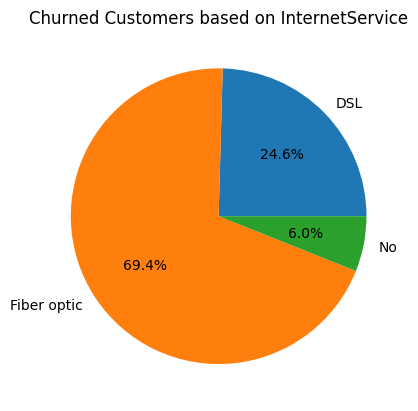

In [62]:
plt.pie(churned_cnt_based_on_is.Churnedcount,labels=churned_cnt_based_on_is.InternetService, autopct='%1.1f%%')
plt.title('Churned Customers based on InternetService')
plt.show()

In [63]:
churned_cnt_based_on_phone= df[df['Churn'] == 'Yes'].groupby('PhoneService').size().reset_index(name='Churnedcount')
churned_cnt_based_on_phone.head()

,PhoneService,Churnedcount
0,No,170
1,Yes,1699


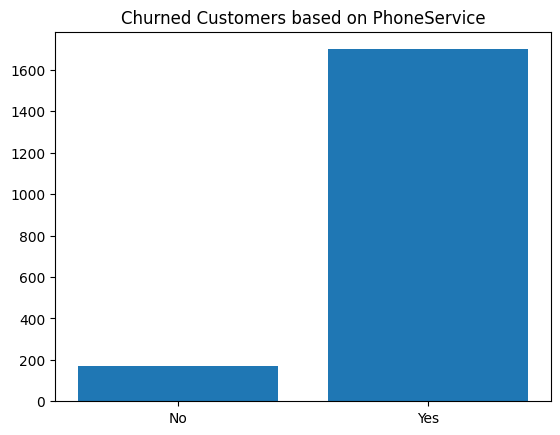

In [64]:
plt.bar(churned_cnt_based_on_phone.PhoneService,churned_cnt_based_on_phone.Churnedcount,)
plt.title('Churned Customers based on PhoneService')
plt.show()

In [65]:
churned_cnt_based_on_dependents= df.groupby(['Dependents','Churn']).size().unstack()
churned_cnt_based_on_dependents.head()

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


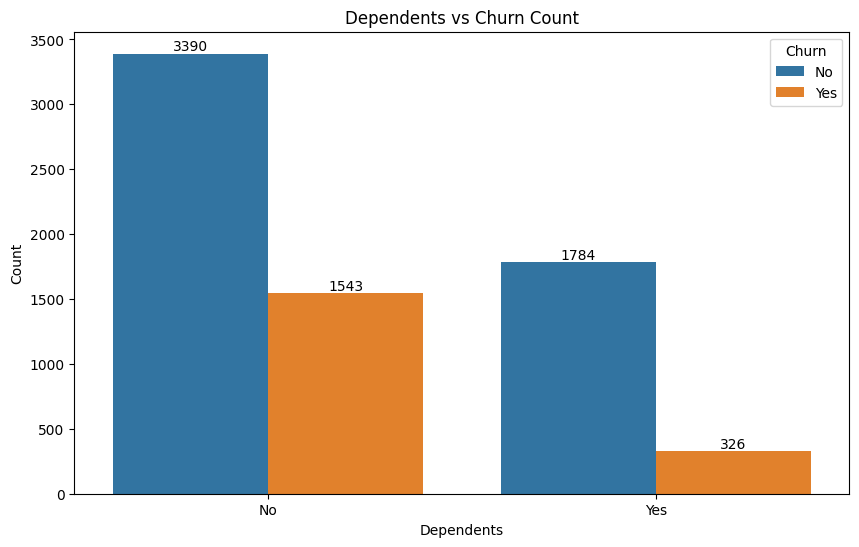

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Dependents vs Churn Count')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [67]:
churned_cnt_based_on_mr= df.groupby(['TechSupport','Churn']).size().unstack()
churned_cnt_based_on_mr.head()

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


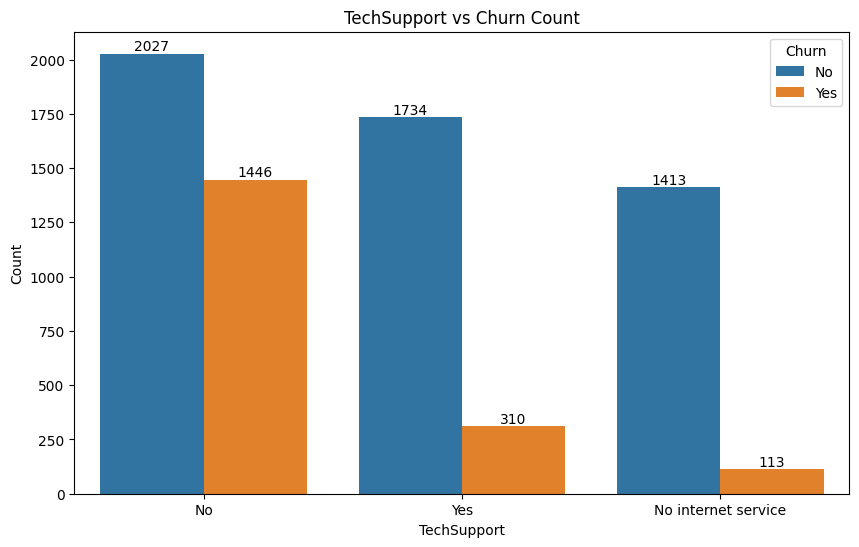

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('TechSupport vs Churn Count')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [69]:
Churned_Customers_based_on_contract = df[df['Churn'] == 'Yes'].groupby('Contract').size().reset_index(name = 'ChurnedCount')
Churned_Customers_based_on_contract.head()

,Contract,ChurnedCount
0,Month-to-month,1655
1,One year,166
2,Two year,48


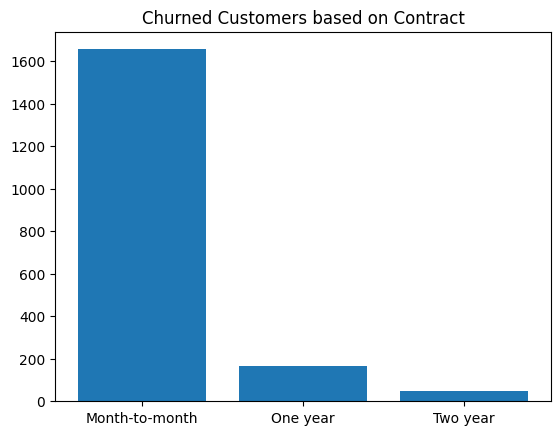

In [70]:
plt.bar(Churned_Customers_based_on_contract.Contract,Churned_Customers_based_on_contract.ChurnedCount)
plt.title('Churned Customers based on Contract')
plt.show()

In [71]:
churned_customers_based_on_services = df[df['Churn'] == 'Yes'].groupby('OnlineSecurity').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_services.head()

,OnlineSecurity,ChurnedCount
0,No,1461
1,No internet service,113
2,Yes,295


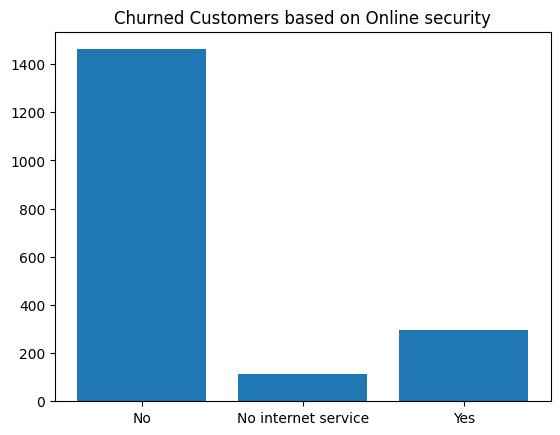

In [72]:
plt.bar(churned_customers_based_on_services.OnlineSecurity,churned_customers_based_on_services.ChurnedCount)
plt.title('Churned Customers based on Online security')
plt.show()

In [73]:
churned_customers_based_on_backup = df[df['Churn'] == 'Yes'].groupby('OnlineBackup').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_backup.head()

,OnlineBackup,ChurnedCount
0,No,1233
1,No internet service,113
2,Yes,523


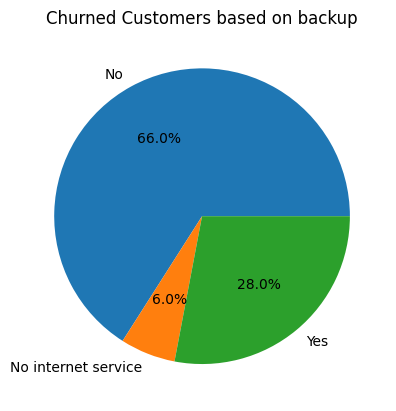

In [74]:
plt.pie(churned_customers_based_on_backup.ChurnedCount ,labels = churned_customers_based_on_backup.OnlineBackup , autopct='%1.1f%%')
plt.title('Churned Customers based on backup')
plt.show()

In [75]:
churned_customers_based_on_device_protection = df[df['Churn'] == 'Yes'].groupby('DeviceProtection').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_device_protection.head()

,DeviceProtection,ChurnedCount
0,No,1211
1,No internet service,113
2,Yes,545


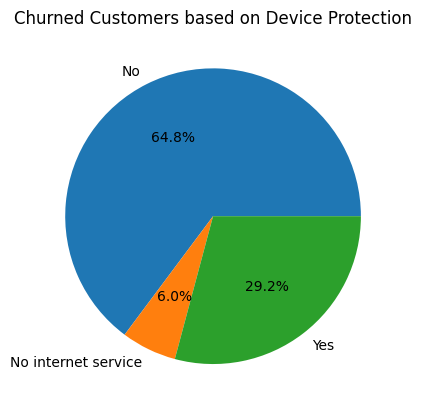

In [76]:
plt.pie(churned_customers_based_on_device_protection.ChurnedCount ,labels = churned_customers_based_on_device_protection.DeviceProtection , autopct='%1.1f%%')
plt.title('Churned Customers based on Device Protection')
plt.show()

In [77]:
counts_for_churns = df.groupby(['Churn']).size().reset_index(name = 'Count')
counts_for_churns.head()

,Churn,Count
0,No,5174
1,Yes,1869


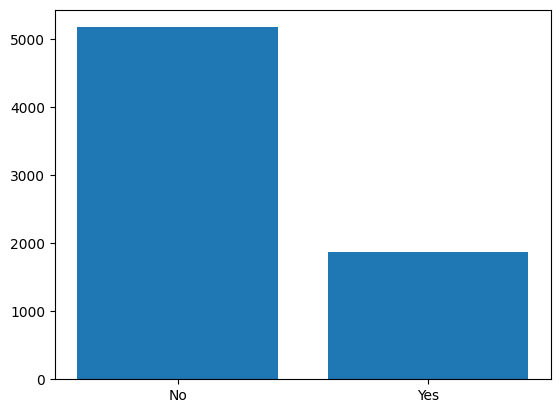

In [78]:
plt.bar(counts_for_churns.Churn,counts_for_churns.Count)
plt.show()

In [79]:
churned_customers_based_on_device_pm = df.groupby(['PaymentMethod','Churn']).size().unstack()
churned_customers_based_on_device_pm.head()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


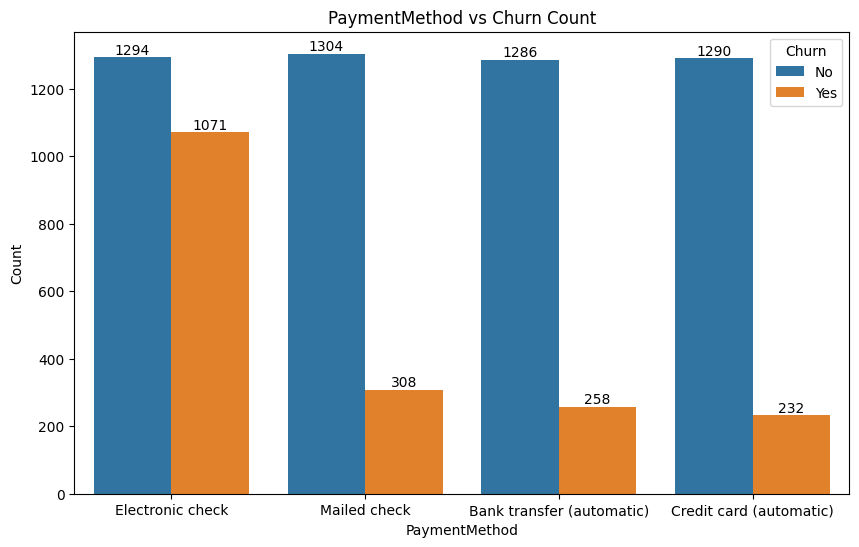

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('PaymentMethod vs Churn Count')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [81]:
churned_customers_based_on_device_plb = df.groupby(['PaperlessBilling','Churn']).size().unstack()
churned_customers_based_on_device_plb.head()


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


C:\Users\NatarajanKumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


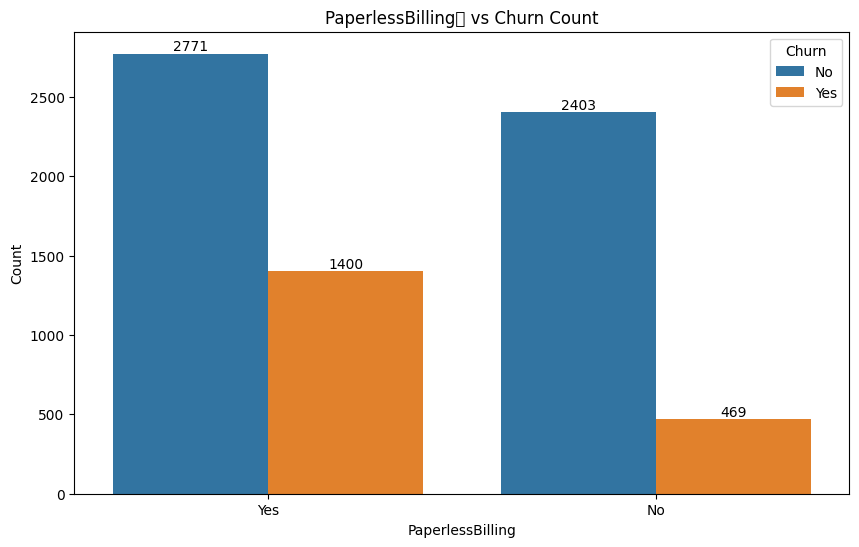

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title('PaperlessBilling	 vs Churn Count')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_18236\3848957299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StreamingServices', y='MonthlyCharges', data=df, palette='Set2')


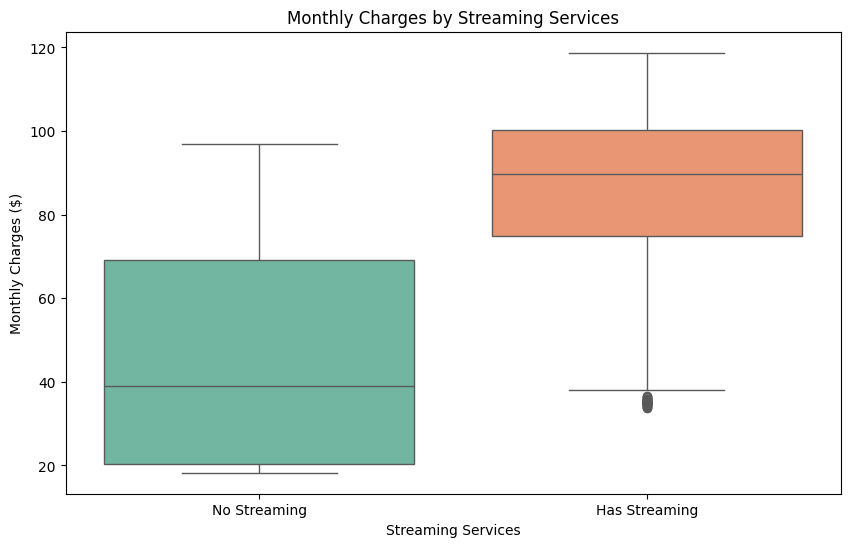

In [83]:
df['StreamingServices'] = df.apply(lambda row: 'Has Streaming' if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes' else 'No Streaming', axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='StreamingServices', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges by Streaming Services')
plt.xlabel('Streaming Services')
plt.ylabel('Monthly Charges ($)')
plt.show()

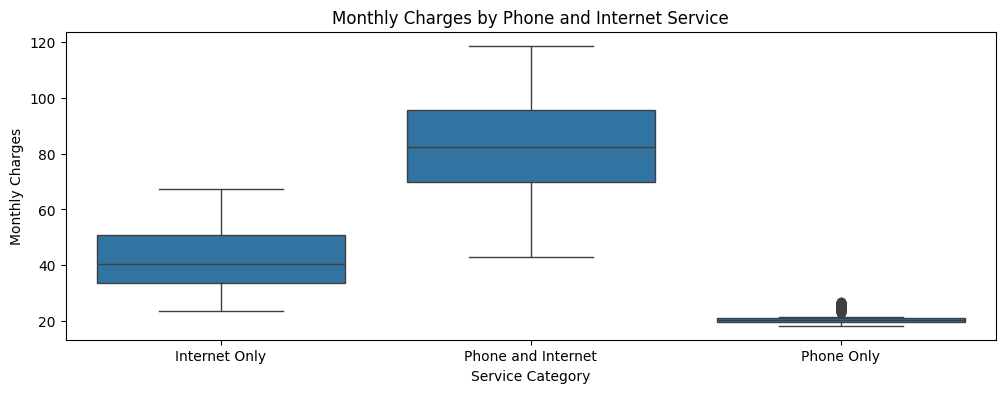

In [84]:
df['ServiceCategory'] = df.apply(lambda row: 
    'Phone Only' if row['PhoneService'] == 'Yes' and row['InternetService'] == 'No' else
    'Internet Only' if row['PhoneService'] == 'No' and row['InternetService'] != 'No' else
    'Phone and Internet', axis=1)

plt.figure(figsize=(12, 4))
sns.boxplot(x='ServiceCategory', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Phone and Internet Service')
plt.xlabel('Service Category')
plt.ylabel('Monthly Charges')
plt.show()

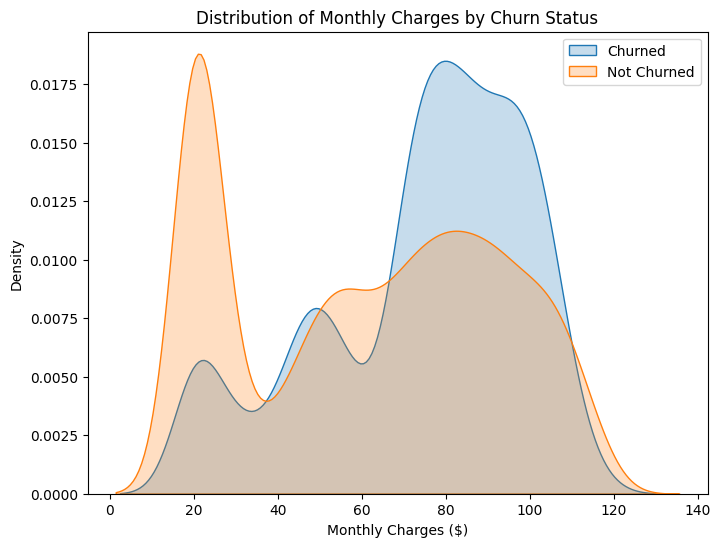

In [85]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churned', fill=True)
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='Not Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [86]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet


FEATURE ENGINEERING

In [87]:
df.drop('customerID',axis=1,inplace =True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet


In [88]:
bins = [0, 12, 24, 48, float('inf')]
labels = ['New Customer', 'Mid-Term Customer', 'Long-Term Customer', 'Loyal Customer']
df['tenure_category'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only,New Customer
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer


In [89]:
churned_customers_based_on_tenure_cat = df.groupby(['tenure_category','Churn']).size().unstack()
churned_customers_based_on_tenure_cat.head()

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_18236\901700845.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_based_on_tenure_cat = df.groupby(['tenure_category','Churn']).size().unstack()


Churn,No,Yes
tenure_category,,
New Customer,1070,999
Mid-Term Customer,738,309
Long-Term Customer,1285,339
Loyal Customer,2081,222


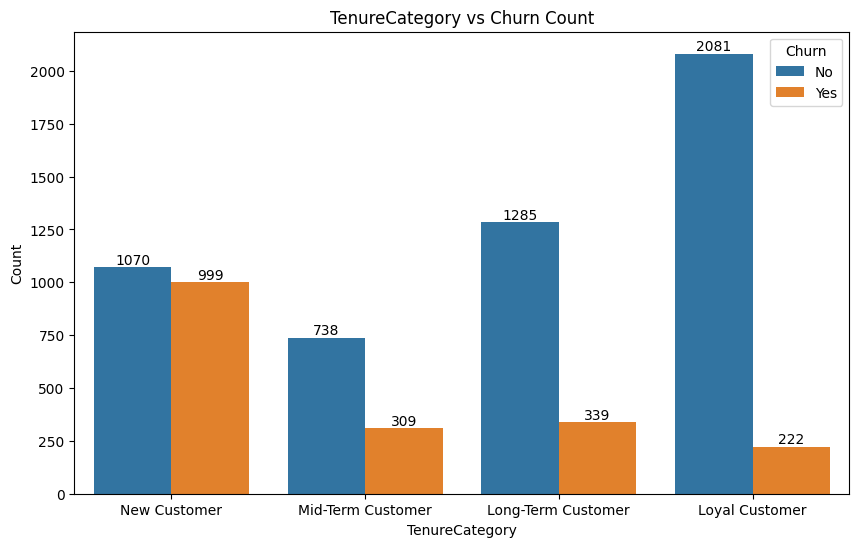

In [90]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tenure_category', hue='Churn')
plt.title('TenureCategory vs Churn Count')
plt.xlabel('TenureCategory')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [91]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category
2968,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,...,Yes,Month-to-month,No,Electronic check,90.40,268.45,No,Has Streaming,Phone and Internet,New Customer
2263,Female,0,No,No,6,Yes,No,Fiber optic,Yes,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),98.15,567.45,Yes,Has Streaming,Phone and Internet,New Customer
414,Female,1,Yes,No,48,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Bank transfer (automatic),70.65,3545.05,No,No Streaming,Phone and Internet,Loyal Customer
6078,Female,0,Yes,No,55,Yes,Yes,DSL,Yes,Yes,...,Yes,One year,Yes,Electronic check,90.15,4916.95,No,Has Streaming,Phone and Internet,Loyal Customer
6326,Female,0,No,No,62,No,No phone service,DSL,No,Yes,...,Yes,Two year,Yes,Credit card (automatic),43.60,2748.7,No,Has Streaming,Internet Only,Loyal Customer


In [92]:
bins = [0, 50, 80, 100, float('inf')]
labels = ['Low Charges', 'Medium Charges', 'High Charges', 'Very High Charges']
df['Charges_paid_for_month'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges


In [93]:
churned_customers_based_on_monthly_charges = df.groupby(['Charges_paid_for_month','Churn']).size().unstack()
churned_customers_based_on_monthly_charges.head()

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_18236\954571091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_based_on_monthly_charges = df.groupby(['Charges_paid_for_month','Churn']).size().unstack()


Churn,No,Yes
Charges_paid_for_month,,
Low Charges,1933,361
Medium Charges,1474,598
High Charges,1116,653
Very High Charges,651,257


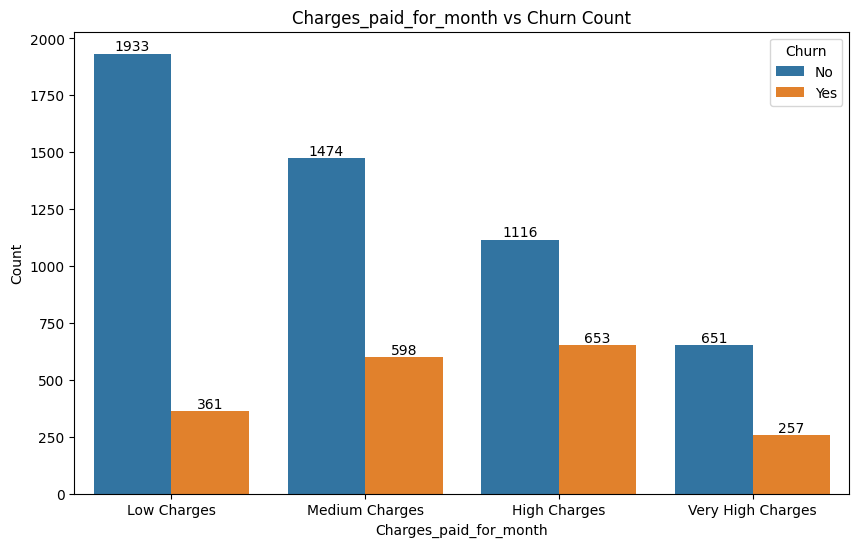

In [94]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Charges_paid_for_month', hue='Churn')
plt.title('Charges_paid_for_month vs Churn Count')
plt.xlabel('Charges_paid_for_month')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges


In [96]:
df['Online_security_new'] = df['OnlineSecurity'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,Yes
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No


In [97]:
df['Online_Backup_new'] = df['OnlineBackup'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No,No


In [98]:
df['Device_protection_new'] = df['DeviceProtection'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new,Device_protection_new
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges,No,Yes,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,Yes,No,Yes
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes,Yes,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges,Yes,No,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No,No,No


In [99]:
df['Tech_support_new'] = df['TechSupport'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new,Device_protection_new,Tech_support_new
3864,Female,0,No,No,30,Yes,Yes,Fiber optic,No,Yes,...,2983.8,Yes,Has Streaming,Phone and Internet,Long-Term Customer,Very High Charges,No,Yes,No,No
1913,Female,0,No,No,65,Yes,Yes,Fiber optic,No,Yes,...,6153.85,No,Has Streaming,Phone and Internet,Loyal Customer,High Charges,No,Yes,Yes,No
6777,Male,0,Yes,No,3,No,No phone service,DSL,No,No,...,92.25,No,No Streaming,Internet Only,New Customer,Low Charges,No,No,No,Yes
6016,Male,0,No,No,68,Yes,Yes,Fiber optic,No,Yes,...,7176.55,Yes,Has Streaming,Phone and Internet,Loyal Customer,Very High Charges,No,Yes,Yes,Yes
5772,Male,0,Yes,Yes,69,Yes,Yes,DSL,No,Yes,...,5601.4,No,Has Streaming,Phone and Internet,Loyal Customer,High Charges,No,Yes,Yes,Yes


In [100]:
df['Multiple_lines_new'] = df['MultipleLines'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new,Device_protection_new,Tech_support_new,Multiple_lines_new
5212,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,...,No,No Streaming,Internet Only,Loyal Customer,Low Charges,Yes,Yes,Yes,No,No
5615,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,Yes,No Streaming,Phone Only,New Customer,Low Charges,No,No,No,No,No
2613,Female,0,No,No,1,Yes,Yes,Fiber optic,No,Yes,...,Yes,No Streaming,Phone and Internet,New Customer,High Charges,No,Yes,No,No,Yes
2202,Male,1,Yes,No,7,Yes,No,Fiber optic,No,No,...,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No,No,No,No,No
4989,Female,0,No,Yes,7,No,No phone service,DSL,Yes,No,...,No,No Streaming,Internet Only,New Customer,Low Charges,Yes,No,No,No,No


In [101]:

encoder = LabelEncoder()
df['is_Online_security'] = encoder.fit_transform(df['Online_security_new'])
df['is_Online_backup'] = encoder.fit_transform(df['Online_Backup_new'])
df['is_Device_protection'] = encoder.fit_transform(df['Device_protection_new'])
df['is_Tech_support'] = encoder.fit_transform(df['Tech_support_new'])
df['is_Multiple_lines'] = encoder.fit_transform(df['Multiple_lines_new'])
df['is_Paper_Less_Billing'] =encoder.fit_transform(df['PaperlessBilling'])
df['Churn'] = encoder.fit_transform(df['Churn']) 
to_drop = ['Online_security_new','Online_Backup_new','Device_protection_new','Tech_support_new','PaperlessBilling','Multiple_lines_new','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','tenure']
df.drop(to_drop,axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,...,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,is_Online_security,is_Online_backup,is_Device_protection,is_Tech_support,is_Multiple_lines,is_Paper_Less_Billing
0,Female,0,Yes,No,No,DSL,No,No,Month-to-month,Electronic check,...,No Streaming,Internet Only,New Customer,Low Charges,0,1,0,0,0,1
1,Male,0,No,No,Yes,DSL,No,No,One year,Mailed check,...,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,1,0,1,0,0,0
2,Male,0,No,No,Yes,DSL,No,No,Month-to-month,Mailed check,...,No Streaming,Phone and Internet,New Customer,Medium Charges,1,1,0,0,0,1
3,Male,0,No,No,No,DSL,No,No,One year,Bank transfer (automatic),...,No Streaming,Internet Only,Long-Term Customer,Low Charges,1,0,1,1,0,0
4,Female,0,No,No,Yes,Fiber optic,No,No,Month-to-month,Electronic check,...,No Streaming,Phone and Internet,New Customer,Medium Charges,0,0,0,0,0,1


In [102]:
categorical_columns = ['InternetService','Contract']
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
one_hot_df = one_hot_df.astype(int)

In [103]:
one_hot_df.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0,1,0,0
1,1,0,0,0,1,0
2,1,0,0,1,0,0
3,1,0,0,0,1,0
4,0,1,0,1,0,0


In [104]:
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded.drop(['InternetService','Contract','StreamingTV','StreamingMovies',"TotalCharges", "MonthlyCharges"],axis=1,inplace=True)

In [105]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaymentMethod,Churn,StreamingServices,ServiceCategory,tenure_category,...,is_Device_protection,is_Tech_support,is_Multiple_lines,is_Paper_Less_Billing,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Female,0,Yes,No,No,Electronic check,0,No Streaming,Internet Only,New Customer,...,0,0,0,1,1,0,0,1,0,0
1,Male,0,No,No,Yes,Mailed check,0,No Streaming,Phone and Internet,Long-Term Customer,...,1,0,0,0,1,0,0,0,1,0
2,Male,0,No,No,Yes,Mailed check,1,No Streaming,Phone and Internet,New Customer,...,0,0,0,1,1,0,0,1,0,0
3,Male,0,No,No,No,Bank transfer (automatic),0,No Streaming,Internet Only,Long-Term Customer,...,1,1,0,0,1,0,0,0,1,0
4,Female,0,No,No,Yes,Electronic check,1,No Streaming,Phone and Internet,New Customer,...,0,0,0,1,0,1,0,1,0,0


MODEL TRAINING & VALIDATION

In [107]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']    
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   SeniorCitizen                             7043 non-null   int64
 1   is_Online_security                        7043 non-null   int64
 2   is_Online_backup                          7043 non-null   int64
 3   is_Device_protection                      7043 non-null   int64
 4   is_Tech_support                           7043 non-null   int64
 5   is_Multiple_lines                         7043 non-null   int64
 6   is_Paper_Less_Billing                     7043 non-null   int64
 7   InternetService_DSL                       7043 non-null   int64
 8   InternetService_Fiber optic               7043 non-null   int64
 9   InternetService_No                        7043 non-null   int64
 10  Contract_Month-to-month                   7043 non-null   in

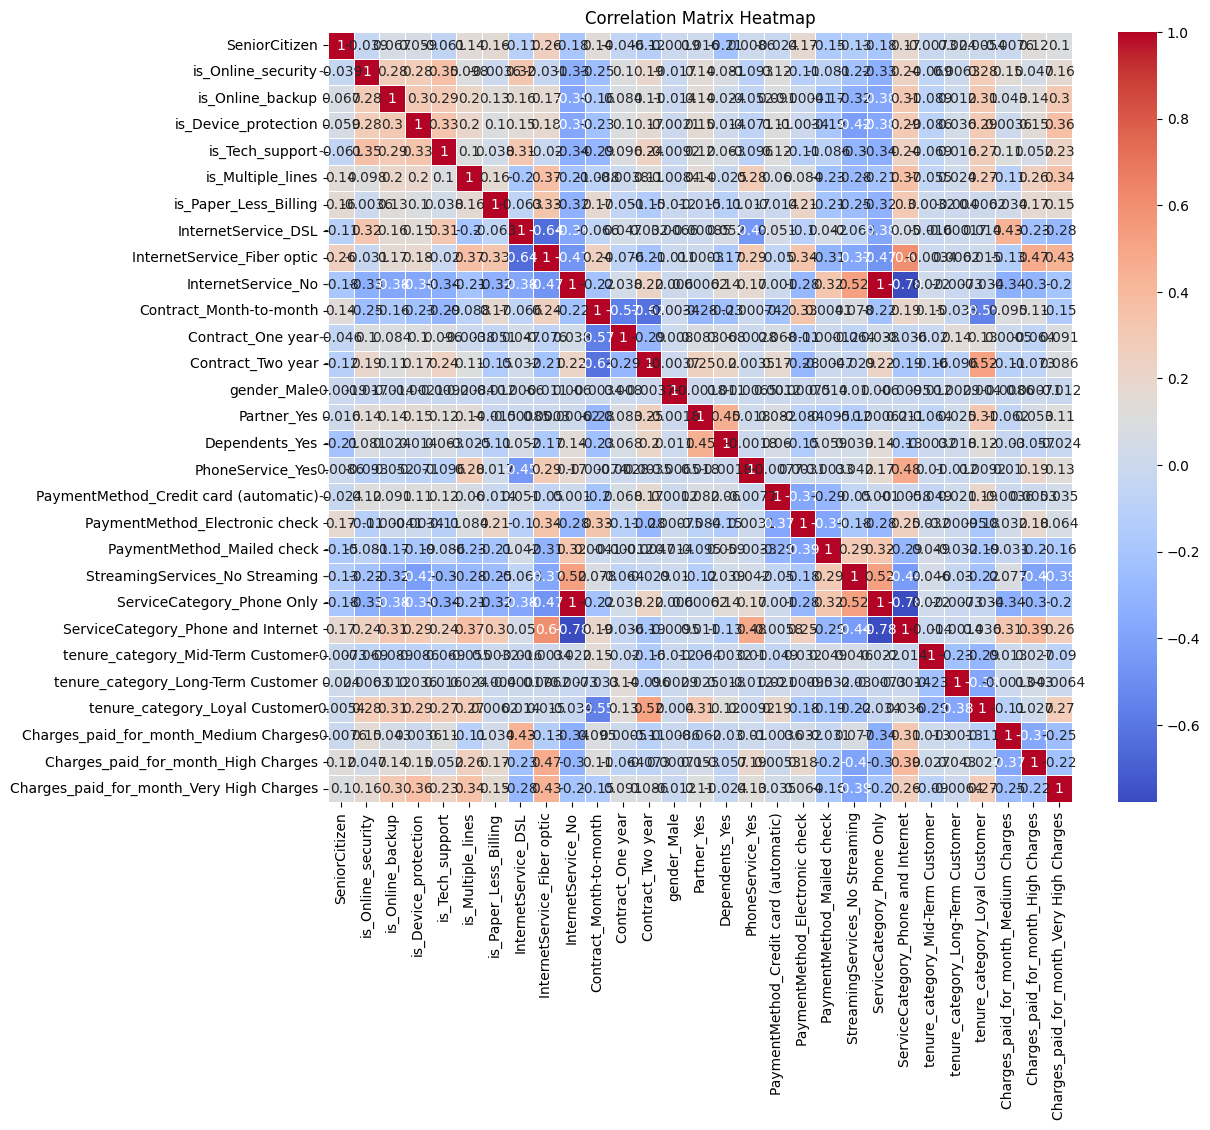

In [109]:
corr_matrix = X.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)
y_train.value_counts(), y_test.value_counts()

(Churn
 0    3622
 1    1308
 Name: count, dtype: int64,
 Churn
 0    1552
 1     561
 Name: count, dtype: int64)

Without SMOTE

In [ ]:
# Define hyperparameter grids
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

logistic_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

xgb_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}

lgbm_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10]
}

# Initialize models
svm_model = SVC(class_weight='balanced', probability=True)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for each model
svm_grid = GridSearchCV(svm_model, svm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
logistic_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    'SVM': svm_grid,
    'Random Forest': rf_grid,
    'Logistic Regression': logistic_grid,
    'XGBoost': xgb_grid,
    'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


With SMOTE

In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define hyperparameter grids
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

logistic_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

xgb_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}

lgbm_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10]
}

# Initialize models
svm_model = SVC( probability=True)
rf_model = RandomForestClassifier( random_state=42)
logistic_model = LogisticRegression( random_state=42, max_iter=1000)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier( random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for each model
svm_grid = GridSearchCV(svm_model, svm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
logistic_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    'SVM': svm_grid,
    'Random Forest': rf_grid,
    'Logistic Regression': logistic_grid,
    'XGBoost': xgb_grid,
    'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\AdithyaKasturi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1035
           1       0.79      0.89      0.84      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.8

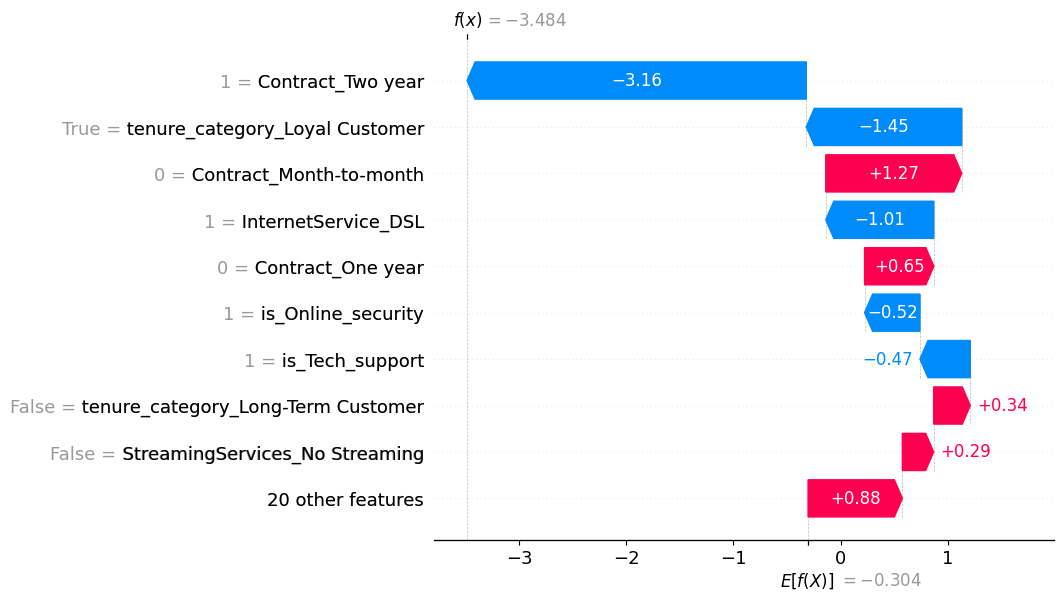

In [ ]:
 # Get the best Logistic Regression model
logistic_best_model = logistic_grid.best_estimator_
 
# Create a SHAP explainer for the Logistic Regression model
explainer = shap.Explainer(logistic_best_model, X_train)
 
# Compute SHAP values for the test set
shap_values = explainer(X_test)
 
# Select the first prediction for the waterfall plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values.values[0],  # SHAP values for the first prediction
    base_values=shap_values.base_values[0],  # Base value for the first prediction
    data=X_test.iloc[0],  # Feature values for the first prediction
    feature_names=X_test.columns  # Feature names
))